In [51]:
conda list

# packages in environment at C:\Data_Projects\D209\env:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                       mkl  
abseil-cpp                20211102.0           hd77b12b_0  
absl-py                   0.15.0             pyhd3eb1b0_0  
aiohttp                   3.8.1            py37h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py37h2bbff1b_0  
astunparse                1.6.3                      py_0  
async-timeout             4.0.1              pyhd3eb1b0_0  
asynctest                 0.13.0                     py_0  
attrs                     21.4.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           py37haa95532_0  
blas                      1.0                         mkl  
bleach                    4.1.0    

# Part I: Research Question

### Using the K-Nearest-Neighbor algorithm, is it possible to predict which patients are at risk of readmission within a month of release from the hospital?

# Part III: Data Preparation

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [122]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.dpi'] = 200

In [123]:
df = pd.read_csv('medical_clean.csv', index_col=0)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [125]:
with pd.option_context('display.max_rows', 6, 'display.max_columns', None): 
    display(df)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.40342,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.99812,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.19246,2,4,4,4,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.21000,3,3,3,4,4,2,3,2
9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.67800,5,5,3,4,4,3,4,3
10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8,70,62682.63,Separated,Female,Yes,18.388620,5,0,1,No,Observation Admission,No,No,Low,Yes,Yes,No,Yes,No,No,Yes,No,No,Blood Work,70.850590,7887.553000,11643.19000,4,3,3,2,3,6,4,3


## Renaming columns

In [126]:
df = df.rename(columns={'ReAdmis': 'Re_admis', 'HighBlood': 'High_blood', 'BackPain': 'Back_pain', 
                        'TotalCharge': 'Total_charge', 'TimeZone' : 'Time_zone'})

In [127]:
survey_names = {'Item8': 'Active_listening', 'Item7': 'Courteous_staff',
                'Item6': 'Treatment_hours', 'Item5': 'Options',
                'Item4': 'Reliability', 'Item3': 'Timely_visits',
                'Item2': 'Timely_treatment', 'Item1': 'Timely_admission'}
df.rename(columns=survey_names, inplace=True)

## Converting 'Zip' to String and adding leading zeros

In [128]:
df.Zip.iloc[30:40]

CaseOrder
31    67355
32     2584
33    41017
34    72760
35    12208
36     5043
37     2468
38     2138
39    68164
40    16878
Name: Zip, dtype: int64

In [129]:
df.Zip = df.Zip.astype('str')
df.Zip = df.Zip.str.zfill(5)

In [130]:
df.Zip.iloc[30:40]

CaseOrder
31    67355
32    02584
33    41017
34    72760
35    12208
36    05043
37    02468
38    02138
39    68164
40    16878
Name: Zip, dtype: object

## Querying for fields containing zero-values

In [131]:
df.loc[:, df.eq(0).any()]

,Population,Children,Full_meals_eaten,vitD_supp
CaseOrder,,,,
1,2951,1,0,0
2,11303,3,2,1
3,17125,3,1,0
4,2162,0,1,0
5,5287,1,0,2
...,...,...,...,...
9996,4762,2,2,1
9997,1251,4,0,0
9998,532,3,2,0


## Checking on the 'Item' columns for input errors

In [132]:
item_columns = df.iloc[: , -8:]
item_columns.loc[: , ~item_columns.isin(range(1,8)).any()]

""
CaseOrder
1
2
3
4
5
...
9996
9997
9998


## Converting string fields to integers

### Binary columns

In [133]:
binary_columns = ['Re_admis', 'Soft_drink', 'High_blood', 'Stroke',
                  'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
                 'Back_pain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
                 'Asthma', ]
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).astype('uint8')
display(df[binary_columns])

,Re_admis,Soft_drink,High_blood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
CaseOrder,,,,,,,,,,,,,
1,0,0,1,0,0,1,1,0,1,1,1,0,1
2,0,0,1,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,1,0,0,0,0,0,0,1,0,1,0
9997,1,0,1,0,1,1,1,0,0,0,0,0,1
9998,1,1,1,0,1,0,0,0,0,1,1,0,0


### One-hot encoding

In [134]:
df.Area.unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [135]:
df.Gender.unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [136]:
df.Initial_admin.unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [137]:
df.Services.unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

#### Area

In [138]:
area_dummies = pd.get_dummies(df['Area'])
display(area_dummies)

,Rural,Suburban,Urban
CaseOrder,,,
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
5,1,0,0
...,...,...,...
9996,0,0,1
9997,0,0,1
9998,1,0,0


In [139]:
df = pd.concat([df, area_dummies], axis=1)
df.drop(['Area', 'Rural'], inplace=True, axis=1)

#### Gender

In [140]:
gender_dummies = pd.get_dummies(df['Gender'])
display(gender_dummies)

,Female,Male,Nonbinary
CaseOrder,,,
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,1,0,0
...,...,...,...
9996,0,1,0
9997,0,1,0
9998,1,0,0


In [141]:
df = pd.concat([df, gender_dummies], axis=1)
df.drop(['Gender', 'Male'], inplace=True, axis=1)

#### Initial_admin

In [142]:
admin_dummies = pd.get_dummies(df['Initial_admin'])
display(admin_dummies)

,Elective Admission,Emergency Admission,Observation Admission
CaseOrder,,,
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
9996,0,1,0
9997,1,0,0
9998,1,0,0


In [143]:
admin_dummies.rename(columns={'Elective Admission': 'Elective_admission',
                             'Observation Admission': 'Observation_admission'}, inplace=True)
df = pd.concat([df, admin_dummies], axis=1)
df.drop(['Initial_admin', 'Emergency Admission'], inplace=True, axis=1)

#### Services

In [144]:
services_dummies = pd.get_dummies(df['Services'])
display(services_dummies)

,Blood Work,CT Scan,Intravenous,MRI
CaseOrder,,,,
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0
...,...,...,...,...
9996,0,0,1,0
9997,0,1,0,0
9998,0,0,1,0


In [145]:
services_dummies.rename(columns={'Blood Work': 'Blood_work'}, inplace=True)
df = pd.concat([df, services_dummies], axis=1)
df.drop(['Services', 'CT Scan'], inplace=True, axis=1)

### Recoding 'Complication_risk'

In [146]:
df.Complication_risk = df.Complication_risk.replace({'Low': 1, 'Medium': 2, 'High': 3}).astype('int')

## Imputing missing 'Population' values

In [147]:
df.Population = df.Population.replace(0, np.nan)
df.Population.isna().sum()

109

In [148]:
df.Population = df.sort_values(by='Zip').Population.fillna(method='bfill')
df.Population.isna().sum()

0

## Exporting Cleaned Dataset

In [149]:
df.to_csv('PA1_cleaned_data.csv')

## Choosing predictor variables

In [150]:
df.drop(['Lat', 'Lng'], axis=1, inplace=True)

In [151]:
corr_matrix = df.corr()

In [152]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(corr_matrix)

,Population,Children,Age,Income,Re_admis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,High_blood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Treatment_hours,Courteous_staff,Active_listening,Suburban,Urban,Female,Nonbinary,Elective_admission,Observation_admission,Blood_work,Intravenous,MRI
Population,1.000000,0.001222,-0.023079,0.005251,0.018951,0.000204,0.012682,-0.026439,0.011806,0.001882,0.008195,-0.002481,0.015229,0.002344,-0.000809,-0.009511,-0.008248,0.007217,-0.013464,0.009464,0.016844,-0.004132,0.015674,0.017061,-0.008415,0.013165,0.025193,-0.001513,-0.001678,0.005971,0.009641,0.010118,0.001715,0.017781,0.006379,-0.008602,0.010667,0.013592,-0.017204,0.009805,-0.001064,-0.011433
Children,0.001222,1.000000,0.009836,0.007176,0.023532,0.009487,-0.002292,0.003835,-0.004319,0.008426,0.001923,0.005123,0.003681,-0.013594,0.007871,0.022479,-0.002909,-0.007785,0.008362,-0.019207,0.005639,0.002324,0.022467,0.024100,0.013548,0.002138,0.001674,-0.002094,0.000728,0.012564,-0.008546,0.004156,-0.019753,0.020453,-0.013862,0.004645,-0.001853,-0.004202,-0.006437,-0.009050,0.010741,-0.005061
Age,-0.023079,0.009836,1.000000,-0.012228,0.015810,0.010315,0.006898,0.008555,0.010014,-0.001337,0.007147,0.012035,0.002887,-0.008292,0.007110,0.003694,0.003736,0.021081,0.006130,0.012092,-0.019609,0.009229,0.016264,0.016876,0.716854,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367,0.019384,-0.016249,0.015334,0.003265,0.013496,-0.008336,-0.013355,0.004142,0.008529
Income,0.005251,0.007176,-0.012228,1.000000,-0.011504,-0.013115,0.013464,-0.011365,0.001253,0.004243,-0.001353,0.002186,-0.001295,-0.018764,-0.005717,-0.010118,0.008670,0.009948,-0.000498,-0.001401,0.016497,0.005904,-0.012465,-0.014345,-0.009825,-0.003494,-0.008182,-0.003782,-0.004301,-0.010642,0.001021,-0.000502,0.021178,0.003293,0.007092,-0.003310,0.001895,0.003388,0.021926,-0.000123,0.006678,-0.002456
Re_admis,0.018951,0.023532,0.015810,-0.011504,1.000000,0.004083,0.000246,-0.012172,0.011039,0.007703,0.002270,0.000918,-0.003236,-0.008586,0.007663,-0.003058,0.004307,0.013313,0.002406,-0.004651,0.005422,-0.017133,0.850862,0.843726,0.013620,-0.016785,-0.002423,-0.011699,-0.001983,0.005614,-0.016894,-0.004974,-0.016740,0.000421,0.007116,-0.011663,0.006428,-0.010880,-0.011972,-0.000718,-0.020313,0.009309
VitD_levels,0.000204,0.009487,0.010315,-0.013115,0.004083,1.000000,0.010210,0.023223,-0.007203,0.004172,0.005660,0.006721,0.003787,0.009689,0.000075,-0.025834,-0.011870,-0.009080,0.007875,-0.005035,-0.014419,0.004937,-0.003642,-0.001403,0.008290,0.013711,0.003979,-0.012103,-0.009872,0.006605,0.006887,-0.009832,-0.021074,-0.008103,0.033131,0.010743,0.008457,-0.017966,-0.013690,0.001475,-0.001984,-0.012840
Doc_visits,0.012682,-0.002292,0.006898,0.013464,0.000246,0.010210,1.000000,-0.002767,0.005681,0.011282,0.008967,-0.002230,0.012306,0.011890,-0.000719,0.012781,-0.026730,0.008514,-0.001684,0.002920,-0.005330,-0.017989,-0.006754,-0.005043,0.008072,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571,0.015099,-0.007584,0.006270,-0.000404,-0.019766,0.015658,0.003403,-0.008700,-0.012822
Full_meals_eaten,-0.026439,0.003835,0.008555,-0.011365,-0.012172,0.023223,-0.002767,1.000000,-0.019980,0.020962,0.014784,0.002784,0.015798,-0.008287,0.011591,0.009603,0.000688,-0.015676,0.008602,0.015120,-0.000562,0.012459,-0.017267,-0.014306,0.018763,0.003724,-0.002022,0.008246,-0.009019,0.009538,0.004294,0.004087,-0.018382,-0.000770,-0.001608,-0.014091,-0.003633,-0.011793,0.004527,-0.005835,0.016177,-0.018954
vitD_supp,0.011806,-0.004319,0.010014,0.001253,0.011039,-0.007203,0.005681,-0.019980,1.000000,-0.014981,0.005340,0.004777,0.009841,-0.005185,-0.012839,-0.015768,0.012759,-0.001641,-0.000499,0.009096,-0.005316,-0.021763,0.015974,0.016924,0.010327,-0.0

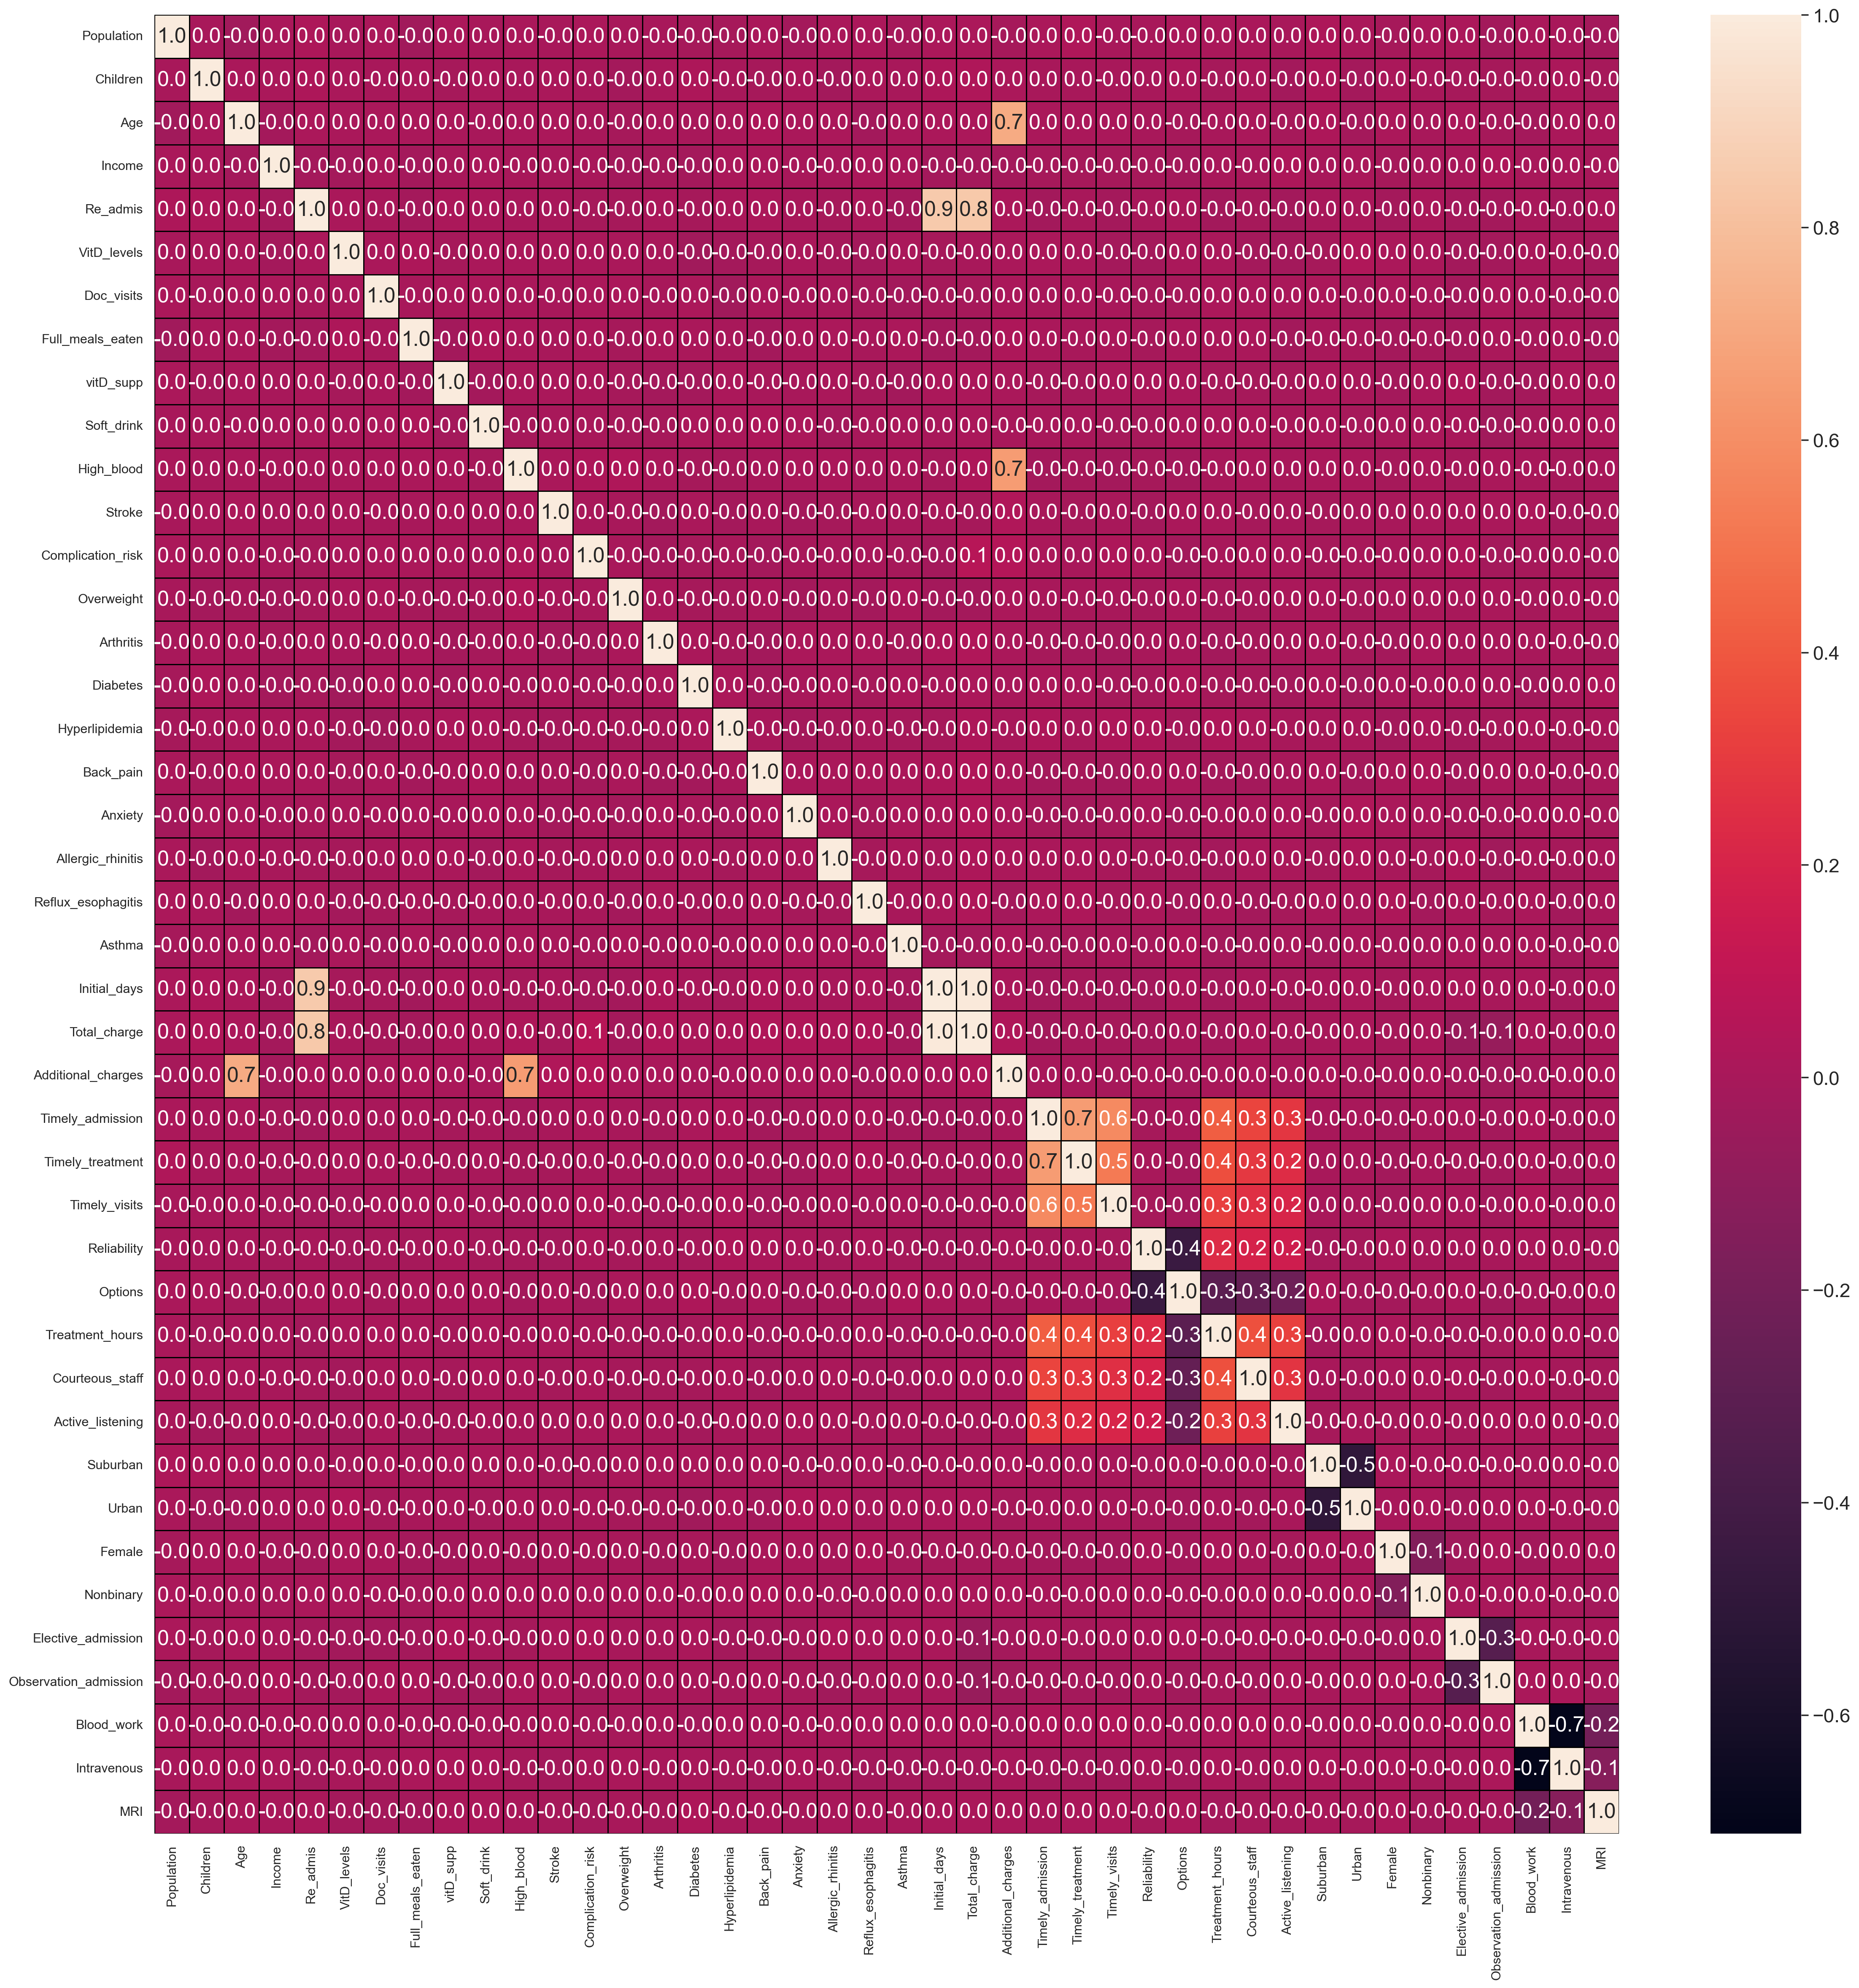

In [153]:
f,ax=plt.subplots(figsize=(28,28))
sns.set(font_scale = 1.5)
sns.heatmap(df.corr(),annot=True, linewidths=1,linecolor="black",fmt=".1f",ax=ax)
plt.show()

<AxesSubplot:xlabel='Total_charge', ylabel='Initial_days'>

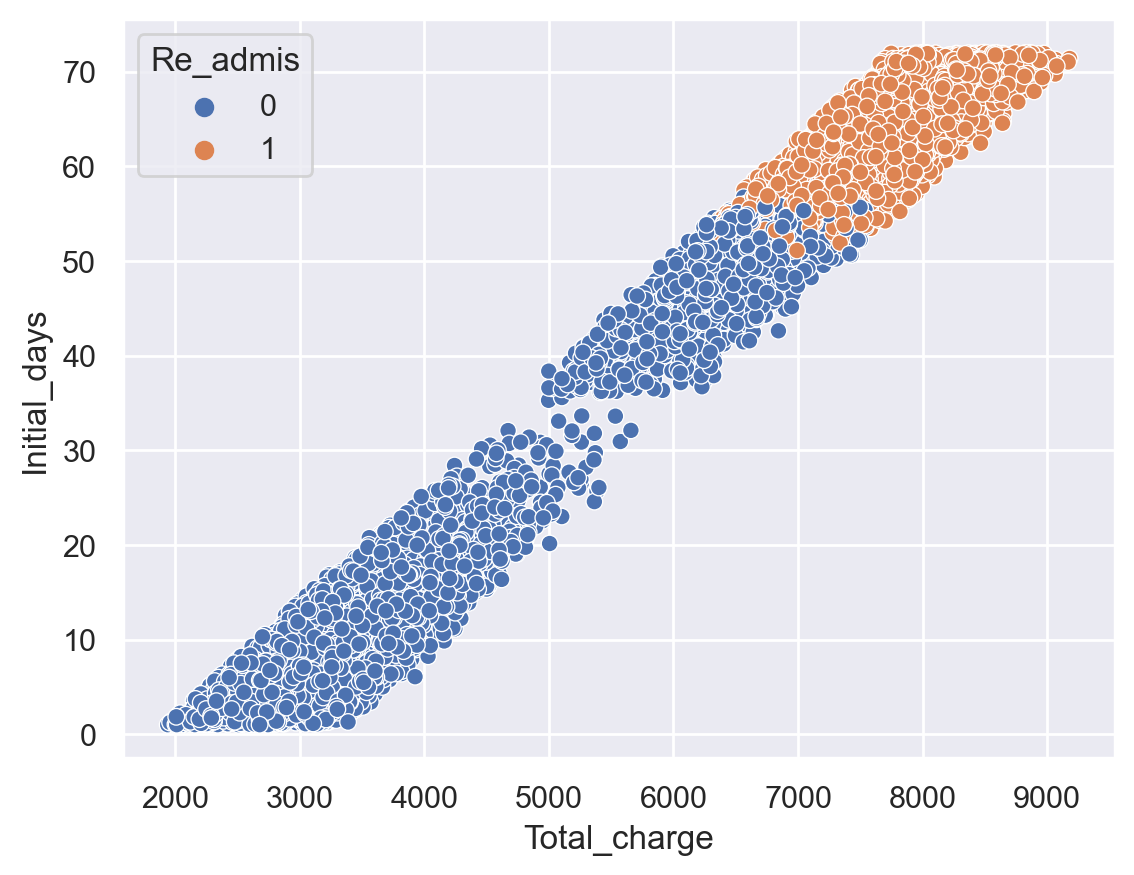

In [154]:
sns.set(font_scale = 1)
sns.scatterplot(data=df, x='Total_charge', y='Initial_days', hue='Re_admis')

# Part IV: Analysis

In [155]:
y = df.Re_admis

In [156]:
X = df[['Initial_days', 'Total_charge']]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [158]:
X_train.to_csv('PA1_X_train.csv')
X_test.to_csv('PA1_X_test.csv')
y_train.to_csv('PA1_y_train.csv')
y_test.to_csv('PA1_y_test.csv')

In [159]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.975


## Model Complexity Curve

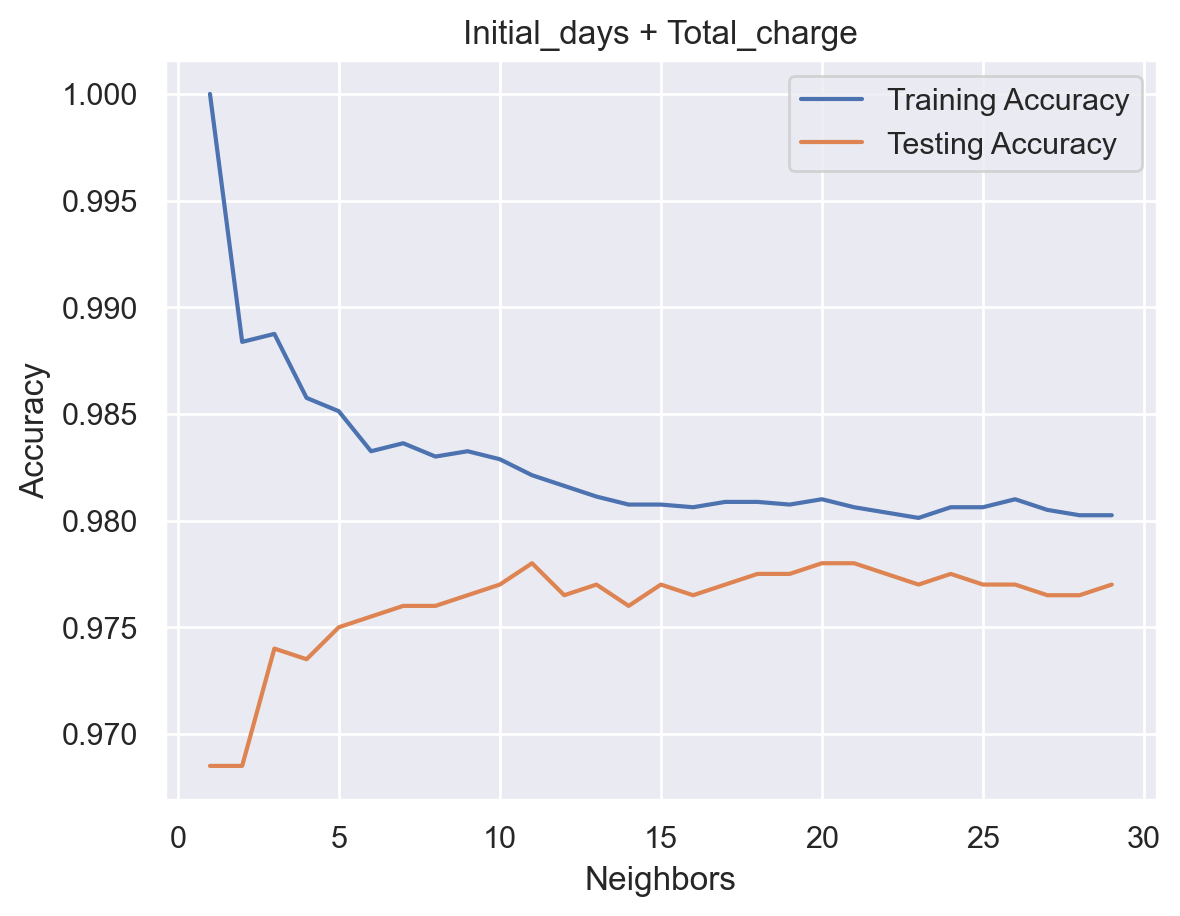

In [160]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    train_accuracy[i] = pipe.score(X_train, y_train)
    test_accuracy[i] = pipe.score(X_test, y_test)

plt.title('Initial_days + Total_charge')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Part V: Data Summary and Implications

In [161]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=11))])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.978


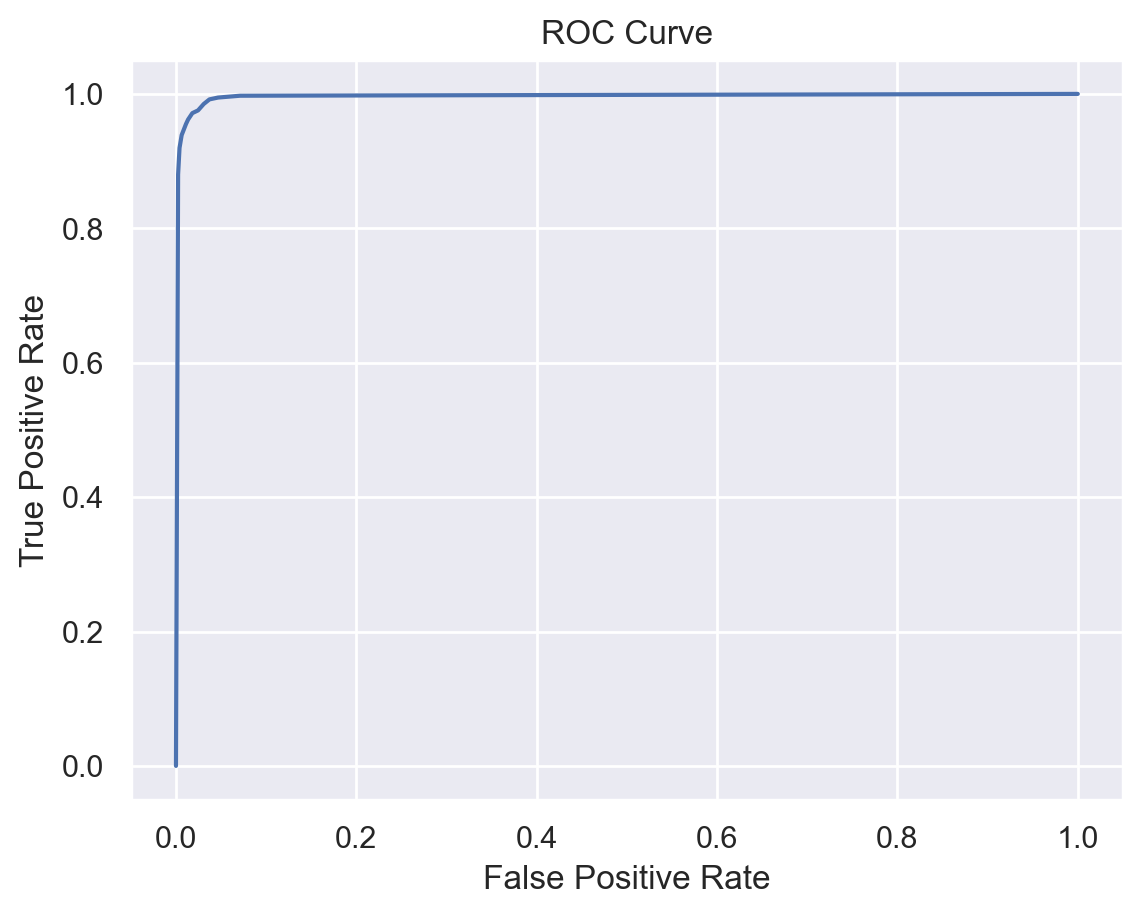

In [162]:
y_pred_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [163]:
print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")

AUC: 0.9960424818454571


### The results show that given the amount of days of a patient’s initial stay and their total charge, you can quite accurately predict whether the patient will be readmitted within a month of release by using the KNN classifier.